In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import math
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve,classification_report

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:\lap trinh\data for analyst\customer_churn.csv", encoding = 'ISO-8859-1')

# I/ Data exploration

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Return
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Những chỉ số thống kê chung

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Xem dữ liệu từng cột

In [7]:
for col in df.columns:
    print("\033[1m"+col+"\033[0m")
    print(df[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

## Số lượng khách hàng rời đi và không rời đi theo thời gian sử dụng sản phẩm

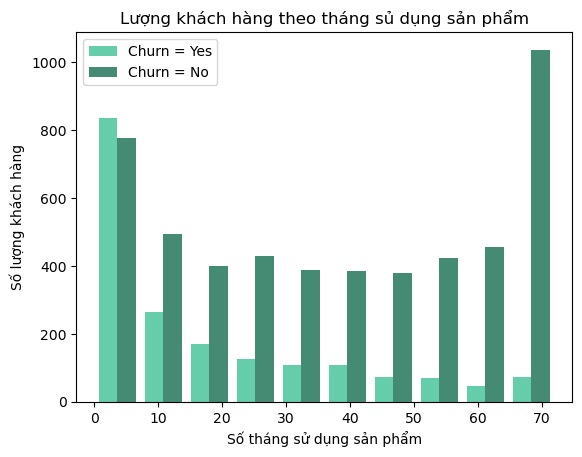

In [8]:
df_tenure_yes = df[df["Return"] == 'Yes'].tenure
df_tenure_no = df[df["Return"] == 'No'].tenure

plt.hist([df_tenure_yes,df_tenure_no],color = ['#66CDAA','#458B74'], label = ["Churn = Yes","Churn = No"])
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Số tháng sử dụng sản phẩm')
plt.title('Lượng khách hàng theo tháng sủ dụng sản phẩm')
plt.legend()
plt.show()

### Nhận thấy : 
#### Khi khách hàng đã tin tưởng chọn mua và sử dụng sản phẩm trong khoảng thời gian đáng kể , thì số lượng khách hàng chọn tiếp tục gắn bó với cửa hàng cao hơn rất nhiều so với số lượng khách hàng rời bỏ. Điều này cho thấy sản phẩm của cửa hàng đáp ứng nhu cầu của khách hàng rất tốt. Và khi khách hàng càng sử dụng sản phẩm trong 1 khoảng thời gian càng lâu, hay có thể nói là có nhu cầu dài hạn, thì sản phẩm càng có thể chứng minh được công dụng hữu ích và cần thiết của nó. Trái lại với những khách hàng có nhu cầu ngắn hạn, chỉ sử dụng trong 1 khoảng thời gian ngắn thì thường có xu hướng rời bỏ cửa hàng.


## Số lượng khách hàng rời đi và không rời đi theo các loại chính sách liên hệ khách hàng từ nhân viên 

In [9]:
df_contract_return = df.groupby(['Contract', 'Return']).count()["customerID"].unstack(fill_value=0).reset_index()
df_contract_return

Return,Contract,No,Yes
0,Month-to-month,2220,1655
1,One year,1307,166
2,Two year,1647,48


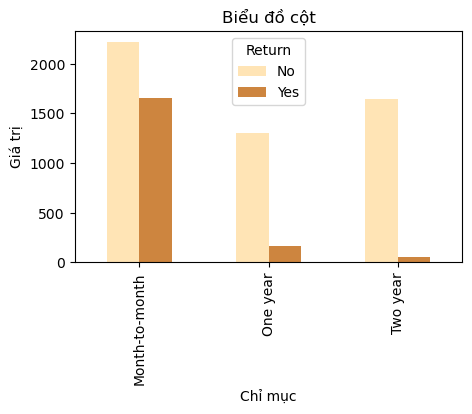

In [10]:
df_contract_return.set_index('Contract').plot(kind='bar', color=['#FFE4B5', '#CD853F'], figsize=(5, 3))
plt.ylabel('Giá trị')
plt.xlabel('Chỉ mục')
plt.title('Biểu đồ cột')
plt.show()

### Nhận thấy 
#### + Đối với những khách hàng rời bỏ hàng :  Khi nhân viên gọi tư vấn hàng tháng mà vẫn có lượng lớn khách hàng rời bỏ lớn thì chỉ có thể là ngay từ đầu tập khách hàng này đã không đánh giá cao hay không có nhu cầu sử dụng sản phẩm. Vì thế cũng dễ hiểu khi đối với loại hình liên lạc theo 1 năm hay 2 năm lượng khách rời đi ít hơn rất nhiều vì đơn giản là đa phần họ đã rời đi ngay từ thời gian đầu. 
#### + Đối với những khách hàng có quay trở lại mua hàng :  Thì dễ dàng nhận thấy, khi mà nhân viên không thường xuyên gọi tư vấn hay cung cấp thông báo về những chính sách hay thay đổi mới thì số lượng khách quay lại mua hàng sẽ giảm .


## Số lượng khách hàng rời đi và không rời đi theo từng khoảng chi phí họ bỏ ra hàng tháng 

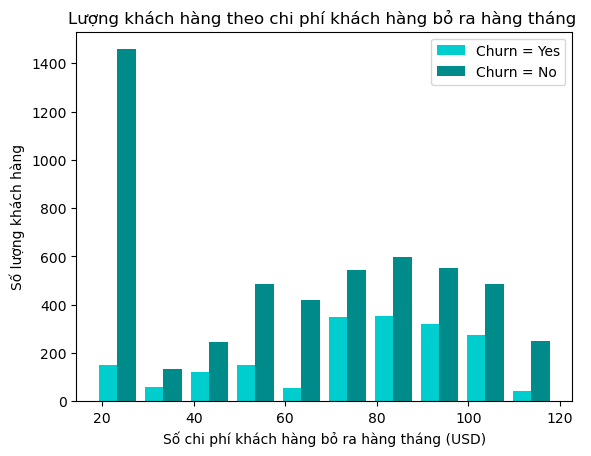

In [11]:
df_MonthlyCharges_yes = df[df["Return"] == 'Yes'].MonthlyCharges
df_MonthlyCharges_no = df[df["Return"] == 'No'].MonthlyCharges

plt.hist([df_MonthlyCharges_yes,df_MonthlyCharges_no],color = ['#00CDCD','#008B8B'], label = ["Churn = Yes","Churn = No"])
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Số chi phí khách hàng bỏ ra hàng tháng (USD)')
plt.title('Lượng khách hàng theo chi phí khách hàng bỏ ra hàng tháng ')
plt.legend()
plt.show()

### Nhận thấy 
#### + Đối với những khách hàng rời bỏ cửa hàng :  Thì đa phần họ có chi phí bỏ ra hàng tháng để mua hàng là trong khoảng 70 đến 90 usd 1 tháng.
#### + Đối với những khách hàng có quay trở lại mua hàng :  Thì phần lớn chi phí bỏ ra hàng tháng của họ dao động ở mức 20 usd 1 tháng, có thể cho rằng những sản phẩm giá rẻ của cửa hàng đáp ứng rất tốt nhu cầu hàng tháng của phần lớn khách hàng.


# Data cleaning cho việc xây dựng mô hình học máy

### Kiểm tra dữ liệu Null

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Return              0
dtype: int64

### Xóa cột mang thông tin không cần thiết cho việc xây dựng mô hình 

In [13]:
df.drop("customerID", axis = 1, inplace = True)

### Ép kiểu dữ liệu Float cho cột TotalCharges

In [14]:
df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],downcast="float")

### Xử lí Outliers cho 3 cột số thực MonthlyCharges ,TotalCharges, Tenure

In [15]:
for col in ["MonthlyCharges","TotalCharges","tenure"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]

### Định dạng dữ liệu string về dạng số nhị nhân để thuận lợi trong việc phân tích

In [16]:
# Định dạng dữ liệu về dạng nhị phân
df.replace({"Yes": 1, "No" : 0}, inplace = True)
df.replace({"Male" : 0, "Female" :1 }, inplace = True)
df.replace(["No internet service", "No phone service"], 0, inplace = True)

### Định dạng dữ liệu về dạng nhị phân đối với những cột có nhiều hơn 2 giá trị khác nhau 

In [17]:
df = pd.get_dummies(data = df, columns=["InternetService", "Contract", "PaymentMethod"])

### Định dạng lại kích cỡ dữ liệu 

In [18]:
col_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

# Data feature relationship

In [19]:
# tạo lập các biến và các tập train và test
x = df.drop("Return", axis =1)
y = df["Return"]

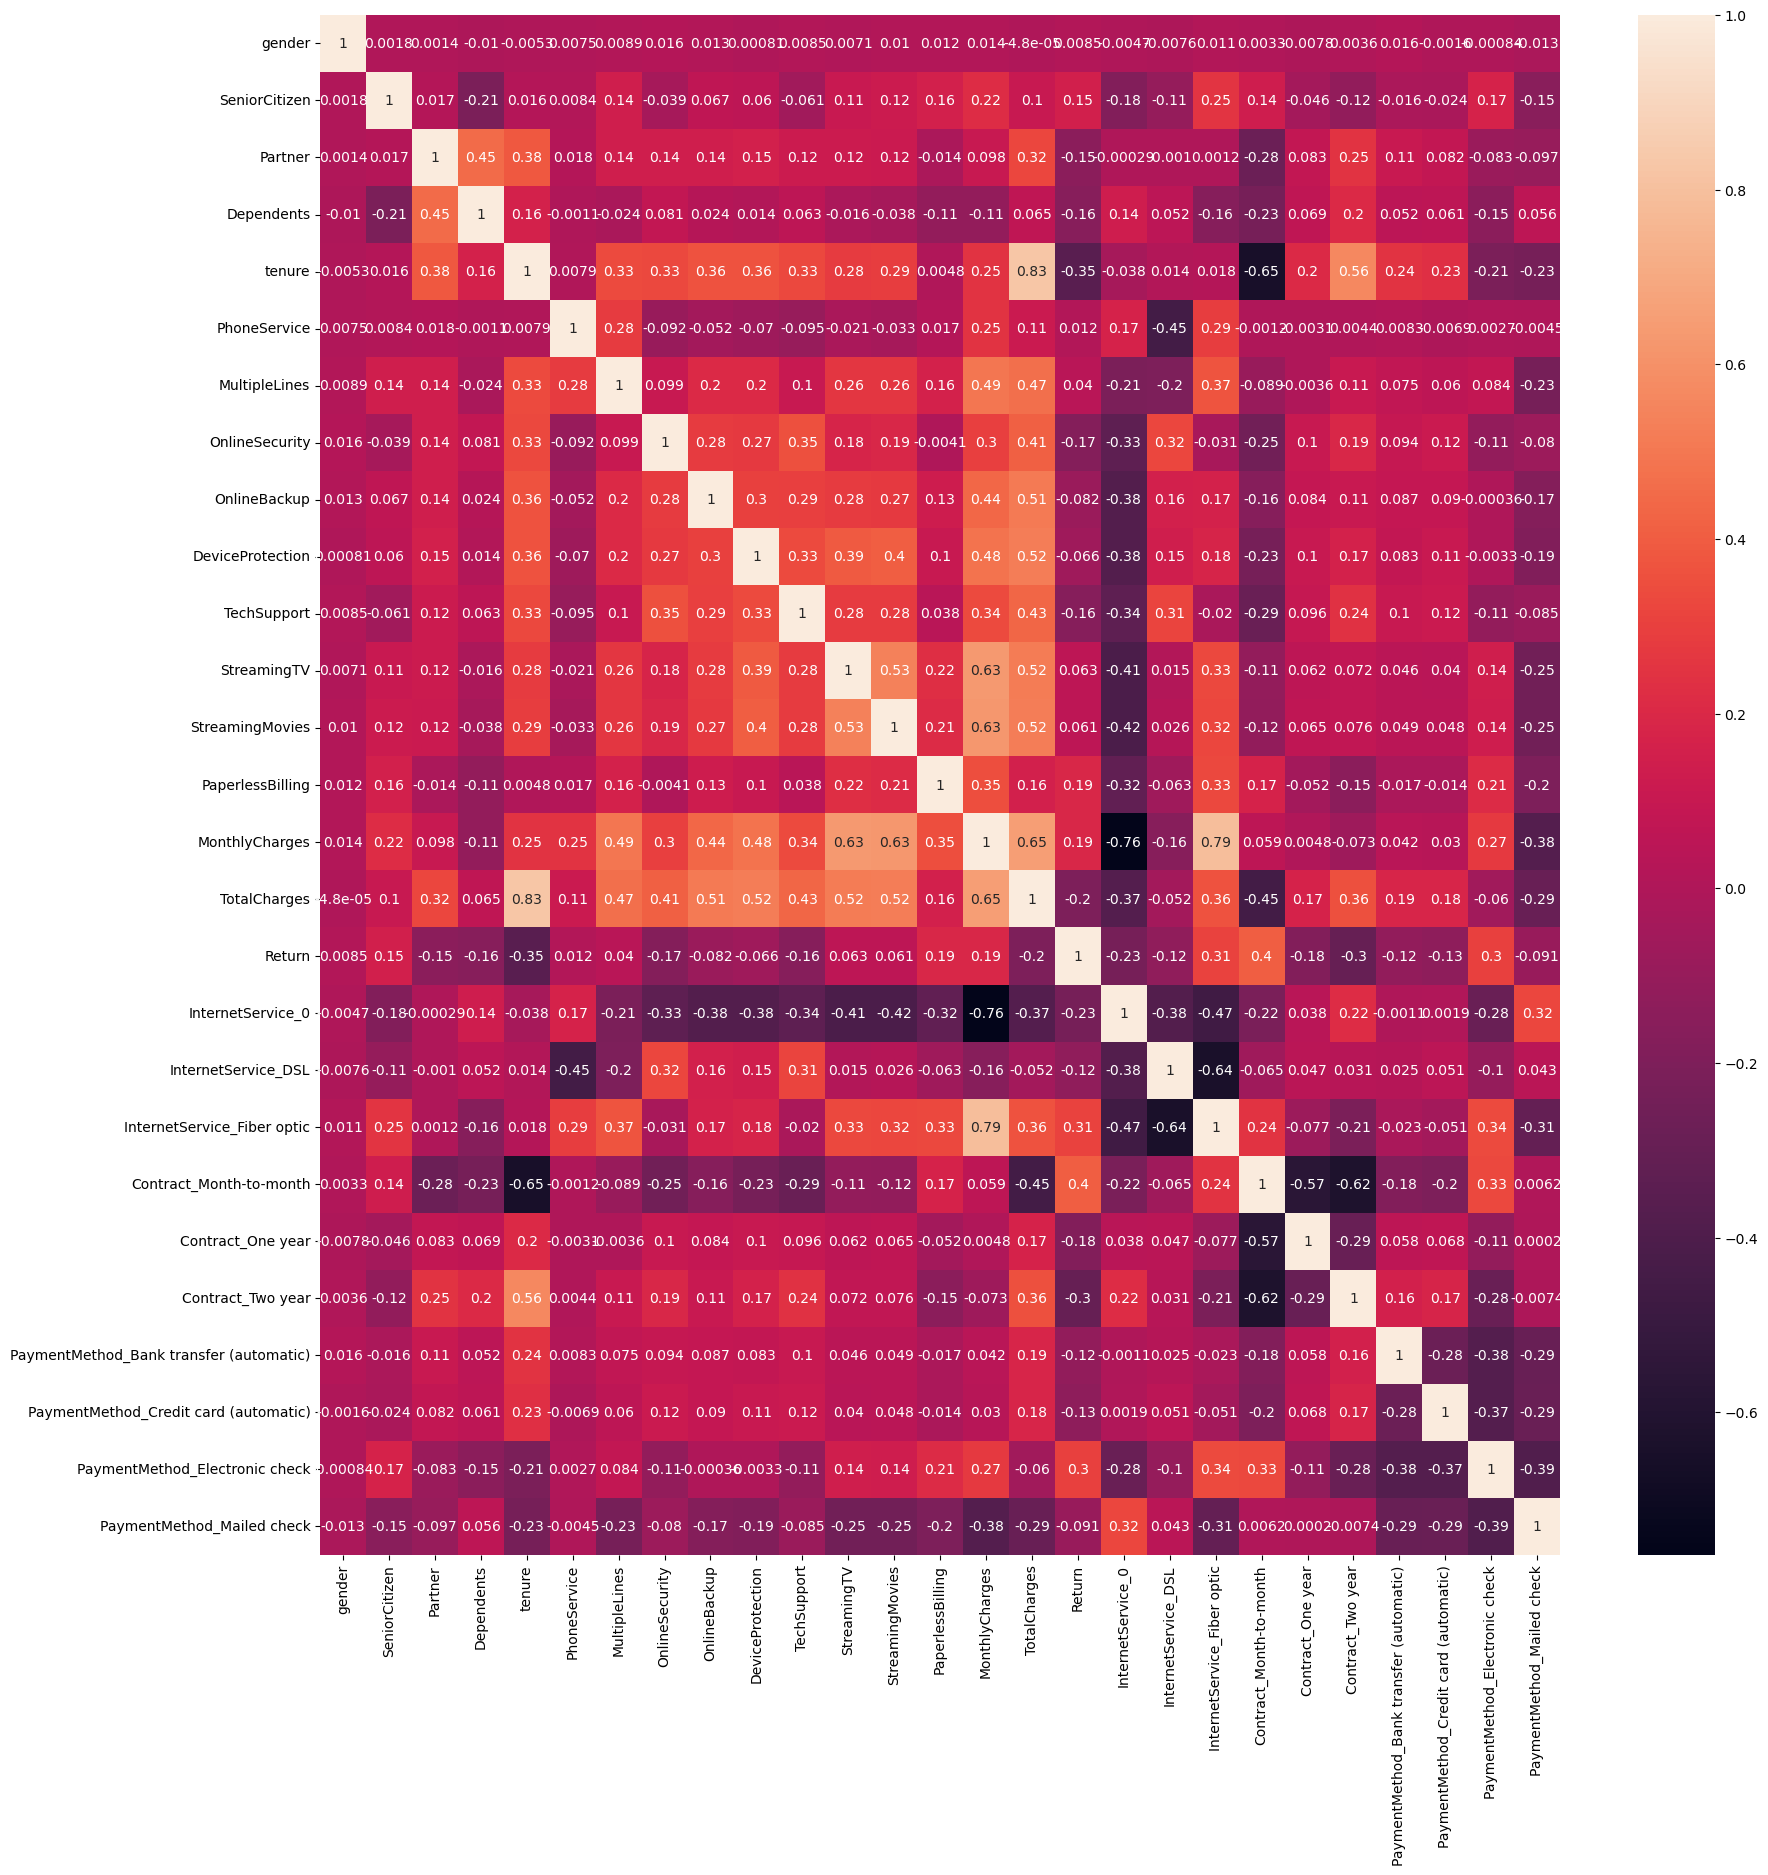

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Data modeling

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 15, stratify = y)

### Xây dựng hàm trả về kết quả đánh giá các thông số cho mô hình

In [22]:
methodDict = {} # Dictionary lưu các keys là tên các mô hình, và values là accuracy_score

def EvaluateModel(model, y_test, y_pred, plot=False):
   
   # Trực quan hóa ma trận nhầm lận
   confusion = metrics.confusion_matrix(y_true =y_test, y_pred = y_pred)
   sns.heatmap(confusion,annot=True,fmt="d") 
   plt.title('Confusion Matrix')
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   plt.show()
   
   # Tính accuracy
   accuracy = metrics.accuracy_score(y_test, y_pred)
   print('Classification Accuracy:', accuracy)
   
   # Tính inaccuracy
   print('Classification Error:', 1 - accuracy)
   
   # Tính những thông số chung
   print('Classification Accuracy: \n' ,classification_report(y_test,y_pred))
   
   # lưu các keys là tên các mô hình, và values là accuracy_score
   methodDict[model.__class__.__name__] = accuracy * 100

### Xây dựng hàm trả về các bộ tham số tối ưu cho các mô hình

In [23]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

def RandomSearch(model, param_dist):
  reg_random = RandomizedSearchCV(estimator=model,
                    param_distributions=param_dist,
                    n_iter=10,  
                    cv=kf,
                    n_jobs=8,
                    scoring='accuracy',
                    random_state =2)
  reg_random.fit(x_train,y_train)
  y_pred = reg_random.predict(x_test)
  print('RandomSearch. Best Score: ', reg_random.best_score_)
  print('RandomSearch. Best Params: ', reg_random.best_params_)
  accuracy_score = EvaluateModel(model, y_test, y_pred, plot =True)

## Build Logistic regression Model

In [24]:
# chạy mô hình 
model_reg = LogisticRegression()
model_reg.fit(x_train,y_train)

# dự đoán tập x test
y_pred_reg = model_reg.predict(x_test)

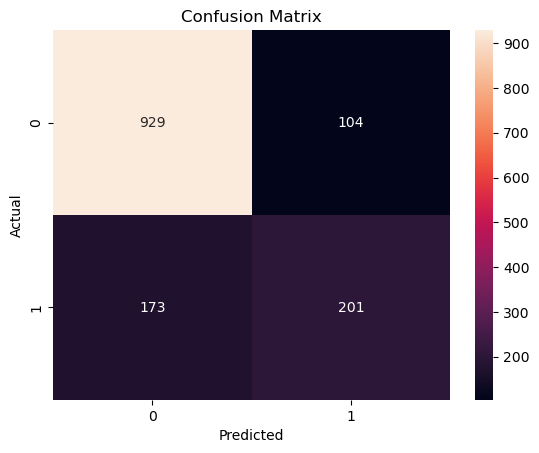

Classification Accuracy: 0.8031272210376688
Classification Error: 0.19687277896233124
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [25]:
EvaluateModel(model_reg,y_test,y_pred_reg,plot=False)

## Build K-NN Model

RandomSearch. Best Score:  0.7916444444444445
RandomSearch. Best Params:  {'weights': 'uniform', 'n_neighbors': 24}


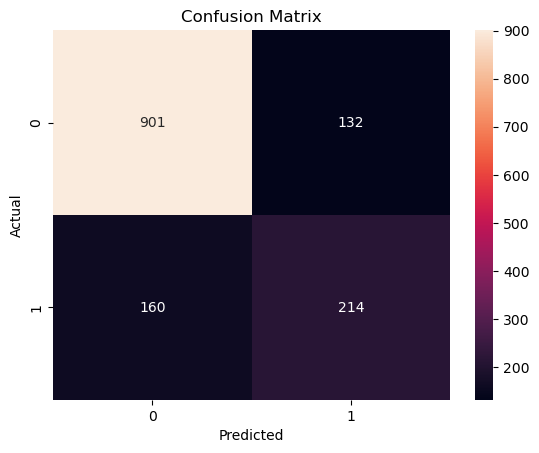

Classification Accuracy: 0.7924662402274343
Classification Error: 0.20753375977256572
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.57      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [26]:
model_KNN = KNeighborsClassifier()

param_dist = {'n_neighbors': list(range(1,31)),
              'weights' :['uniform', 'distance']}

RandomSearch(model_KNN, param_dist)

## Build Bayes Model

In [27]:
model_bayes = GaussianNB()
model_bayes.fit(x_train, y_train) 
y_pred_bayes = model_bayes.predict(x_test)

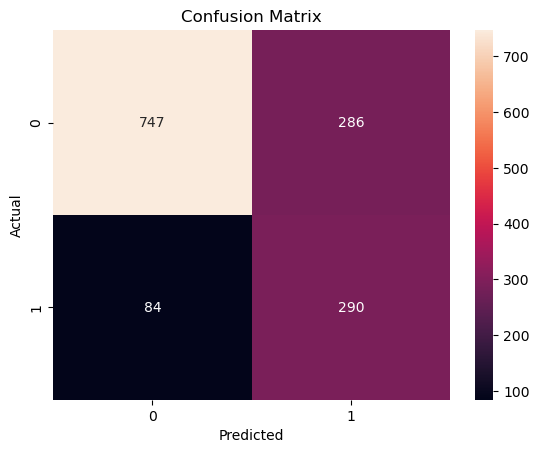

Classification Accuracy: 0.7370291400142146
Classification Error: 0.2629708599857854
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



In [28]:
EvaluateModel(model_bayes,y_test,y_pred_bayes,plot=False)

## Build Perceptron Model

In [29]:
model_percep = Perceptron(random_state= 42, max_iter= 100, tol = 0.001)
model_percep.fit(x_train, y_train) 
y_pred_percep = model_percep.predict(x_test)

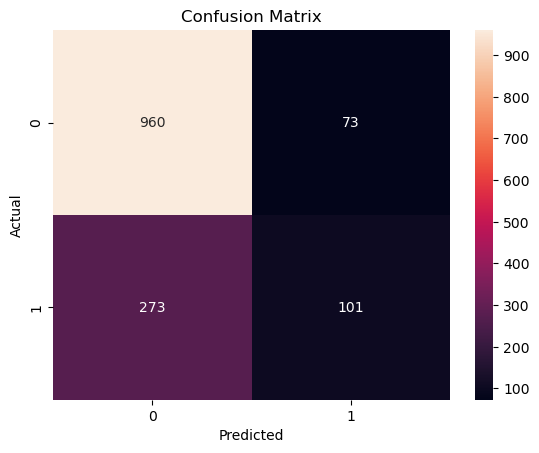

Classification Accuracy: 0.7540867093105899
Classification Error: 0.24591329068941015
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1033
           1       0.58      0.27      0.37       374

    accuracy                           0.75      1407
   macro avg       0.68      0.60      0.61      1407
weighted avg       0.73      0.75      0.72      1407



In [30]:
EvaluateModel(y_pred_percep,y_test,y_pred_percep,plot=False)

## Build Neural network tree Model

In [31]:
model_neural = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver= 'adam', max_iter=500)
model_neural.fit(x_train, y_train) 
y_pred_neural = model_neural.predict(x_test)

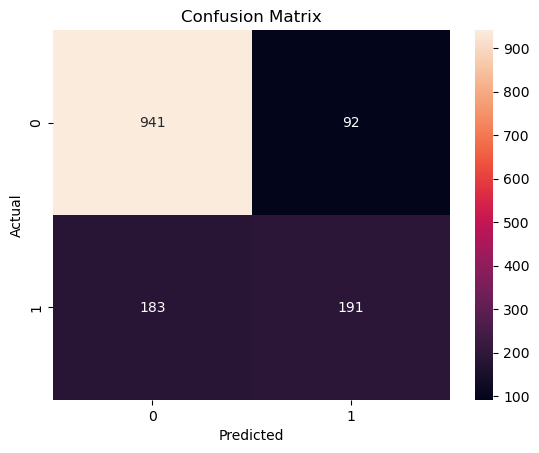

Classification Accuracy: 0.8045486851457001
Classification Error: 0.1954513148542999
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [32]:
EvaluateModel(model_neural,y_test,y_pred_neural,plot=False)

## Build RandomForest model

########### Random Forest ###############
RandomSearch. Best Score:  0.8024888888888888
RandomSearch. Best Params:  {'n_estimators': 67, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 11, 'max_depth': 8, 'criterion': 'gini'}


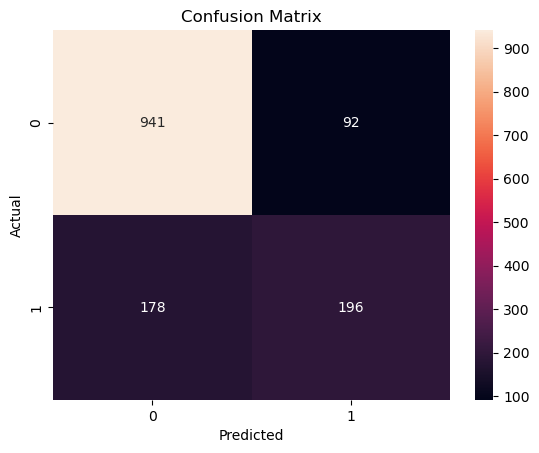

Classification Accuracy: 0.8081023454157783
Classification Error: 0.1918976545842217
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [33]:
model_RDF = RandomForestClassifier()
estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
param_dist = {'n_estimators' : estimators,
             'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(x.columns))),
              "min_samples_split": list(range(3, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]} 


print('########### Random Forest ###############')

RandomSearch(model_RDF, param_dist)


## Build Decision tree model

########### Decision-Tree ###############
RandomSearch. Best Score:  0.7932444444444445
RandomSearch. Best Params:  {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 19, 'max_depth': 5, 'criterion': 'gini'}


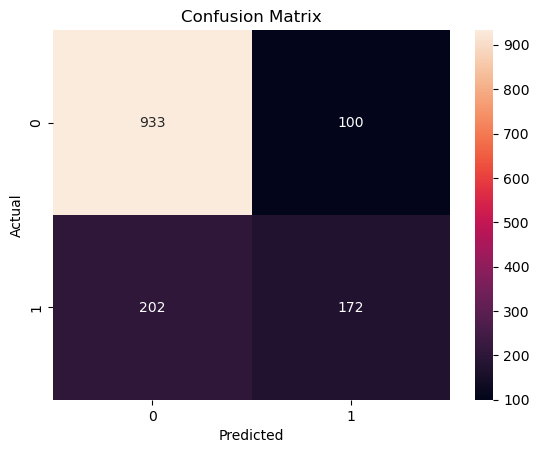

Classification Accuracy: 0.7853589196872779
Classification Error: 0.2146410803127221
Classification Accuracy: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [34]:
model_DTC = DecisionTreeClassifier()
param_dist = {'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(x.columns))),
              "min_samples_split": list(range(2, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"],
              } 

print('########### Decision-Tree ###############')
RandomSearch(model_DTC, param_dist)

# Best Model for selection

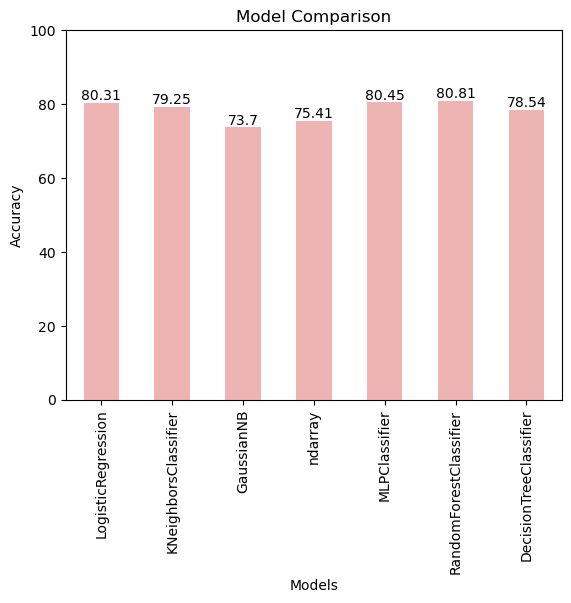

In [35]:
s = pd.Series(methodDict)

# Vẽ biểu đồ cột
ax = s.plot(kind='bar',color ="#EEB4B4")

# Đặt giới hạn trục y
plt.ylim(0, 100)

# Đặt nhãn cho trục x và trục y
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Đặt tiêu đề cho biểu đồ
plt.title('Model Comparison')

# Hiển thị số trên từng thanh cột
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

### Neural network tree Model là mô hình cho thấy kết quả tốt nhất về việc phân loại khách hàng trong việc có bao nhiêu khả năng phần trăm 1 khách hàng sẽ quay lại mua hàng sau lần mua hàng đầu tiên .